# Comp Econ Homework 9

**Author**: Chase Coleman

**Date**: 16 April 2015

In [1]:
import numpy as np
import numpy.linalg as la
import matplotlib.pyplot as plt
import quantecon as qe

%matplotlib inline

Submit the following in a single Jupyter notebook with the usual naming convention `firstname_lastname.ipynb`. Alternatively, if it's painful to wrte LaTeX in the ntoebook, then you can add a single file with analytical solutions called `firstname_lastname_analysis.pdf`. Please make sure that you have your name at the top of each file, and that you put your file in the right folder of the homework GitHub repo.

As always, you are free to collaborate, and think through algorithms and proof solutions together. Just type up your own version at the end.

## Exercise 1

### Question

Prove that for every $A \in \mathcal{M}(n \times n)$ we have $||A|| = \sqrt{\rho(A'A)}$.

### Answer

We define the spectral norm by:

$$||A|| = \sup \{ \frac{||A x||}{||x||} : x \in \mathbb{R}^n \neq 0 \}$$

In class we showed that, without loss of generality, we can restrict our focus to $x \in \mathbb{R}^n$ such that $||x|| = 1$. We use this here to write the spectral norm as

$$||A|| = \sup \{ ||A x|| : ||x|| = 1 \}$$

Notice that the n-dimensional unit sphere, $||x|| = 1$, is a compact set, so we replace $\sup$ with $\max$ because we know that the optimal value is attained. The optimization problem can be written by

\begin{align*}
  &\max_{x} ||A x|| \\
  &\text{subject to } ||x|| = 1
\end{align*}

We make an order-preserving transformation to solve an algebraically cleaner problem by squaring the objective function (Note: This is only order preserving because the objective is weakly positive). We can also square the constraint because it is equal to 1. The Lagrangian for this transformed problem can be written 

$$ \mathcal{L} = x'A'Ax + \lambda (1 - x'x)$$

If we take the derivative with respect to $x$ we get

$$A'A x = \lambda x$$

Notice that this implies that $x$ is an eigenvector of $A'A$. The question remains, which eigenvalue this vector corresponds to.

Recall that our objective was $x' A' A x$. If we pre-multiply both sides of the previous equation by $x'$, we get

$$x' A' A x = x' \lambda x$$

Note that $x' x = 1$ then

$$x' A' A x = \lambda$$

It then becomes obvious that we choose the eigenvalue eigenvector pair that achieves the highest eigenvalue. Then for $\rho(A) := \max \{ | \lambda | : \lambda \text{ is an eigenvalue of } A \}$ the original objective function achieves $\sqrt{\rho(A' A)}$ as desired.

## Exercise 2

### Question

Making use of Gelfand's formula, show that if $\rho(A) < 1$,  then $\sum_{k=0}^\infty ||A^k|| < \infty$. In particular, show that under the stated condition there exists an $r < 1$ and a $C \in \mathbb{N}$ such that $||A^k|| \leq r^k C$ for all $k \in \mathbb{N}$.

## Answer

Thanks to Balint for pointing me in right direction here.

One can show that $\rho(A) < ||A^k||^{1/k}$. This is indicative to us of how we should pick our value for $r$. Fix $r$ such that $\rho(A) < r < 1$.

Gelfand's formula says

$$ \lim_{k \rightarrow \infty} ||A^k||^{1/k} \rightarrow \rho(A)$$

This means for a fixed $\varepsilon$ there exists $N_{\varepsilon}$ such that for all $N > N_{\varepsilon}$ that $d(\rho(A), ||A^N||^{1/N}) < \varepsilon$. This implies that $\varepsilon = r - \rho(A)$ that for all $N > N_{\varepsilon}$ that $r > ||A^N||^{1/N}$.

Now choose $C$ according to the following rule

$$C = \max \{ z \in \mathbb{N} : z > \frac{1}{r^k} ||A^k||^{1/k} \; \forall k = 0, 1, 2, \dots, N_{\varepsilon} \}$$

Note, for all $k > N_{\varepsilon}$ that $||A^k||^{1/k} < r$. For $k < N_{\varepsilon}$ we get

\begin{align*}
  ||A^k||^{1/k} &\leq r^k \frac{1}{r^k} \max_{n=0,1,\dots,N_{\varepsilon}} ||A^n||^{1/n} \\
  &\leq r^k C
\end{align*}

Thus

$$\sum_{k=0}^{\infty} ||A^k||^{1/k} \leq \sum_{k=0}^{\infty} r^k C = \frac{C}{1-r} < \infty$$

## Exercise 3

### Question

Show that if $\rho(A) < 1$, then $||A^k|| \rightarrow 0$ as $k \rightarrow \infty$ without using Gelfand's formula. Assume that $A$ is diagonalizable.

### Solution

$A$ diagonalizable means that we can write $A = P^{-1} D P$ for a diagonal matrix $D$. In particular, we can choose 

$$D = \begin{bmatrix} \lambda_1 & 0 & \dots & 0 \\
                      0 & \lambda_2 & 0 & \dots \\
                      0 & \ddots & 0 & \dots \\
                      0 & \dots & 0 & \lambda_n \end{bmatrix}$$
                      
where $\lambda_i$ is the $i$th eigenvalue additionally $P$ is a matrix of the eigenvectors in this case. Without loss of generality we order the eigenvalues increasingly i.e. $\lambda_1 < \lambda_2 < \dots < \lambda_n$. We can write

\begin{align*}
  || A^k || &= || P^{-1} D^k P || \\
  &\leq ||P^{-1}|| \; ||D^k|| \; ||P||
\end{align*}

Note, if we can show $||D^k|| \rightarrow 0$ then $||P^{-1}|| ||D^k|| ||P|| \rightarrow 0$. Since $D$ is diagonal we can write

\begin{align*}
  ||D^k|| &= \sqrt{\rho(D^{2k})} \\
  &= \sqrt{\lambda_n^{2k}} \\
  &= \lambda_n^k
\end{align*}

since $\rho(A) < 1$ then $\lim_{k \rightarrow \infty} \lambda_n^k \rightarrow 0$ which implies $||D^k|| \rightarrow 0$. Thus we get $||A^k|| \rightarrow 0$ as desired.

## Exercise 4

### Question

Show that the set of non-negative definite matrices is a closed subset of $(\mathcal{M}(n\times n), ||\cdot||)$

### Solution

We want to show the set of non-negative definite matrices is a closed subset of $(\mathcal{M}(n \times n), || \cdot ||)$; we will proceed to take a generic sequence which is converging to an element and show that the element it converges to is also in the set.

Let $\{A_n \}$ be a sequence of matrices in $( \mathcal{M}(n \times n), || \cdot ||)$ such that $A_n \succeq 0$ $\forall n$ -- Use notation $A \succeq 0$ to denote semi-positive definite (or non-negative definite). Let

$$\lim_{n \rightarrow \infty} A_n = A$$

We want to show $A \succeq 0$. Will use $X = \{ x \in \mathbb{R}^n : ||x||=1\}$.

Notice $\lim_{n \rightarrow \infty} A_n = A$ implies $\lim_{n \rightarrow \infty} || A_n - A || = 0$. This implies

\begin{align*}
  \lim_n \max_{x} || A_n - A || = 0 \\
  \lim_n \max_{x \in X} x' (A_n - A) x = 0 
\end{align*}

Since the max over all values of $x \in X$ is equal to 0, then for any $y \in X$ we have:

\begin{align*}
  \lim_n y' (A_n - A) y \leq 0 \\
  \lim_n y' A_n y \leq y' A y
\end{align*}

Additionally, since $A_n \succeq 0$ for all $n$ we can write

$$0 \leq \lim_n y' A_n y \leq y' A y$$

Thus $A \succeq 0$ and the limit is contained in the set. This means the set of non-negative definite matrices is a closed subset of $(\mathcal{M}(n \times n), || \cdot ||)$

## Exercise 5

### Question

Let $M, A$ be in $\mathcal{M}(n \times n)$ with $\rho(A) < 1$. Let $X^*$ be the unique solution to the Lyapunov equation

$$X = A X A' + M$$

Show that if

(1) $M$ symmetric $\Rightarrow$ $X^*$ symmetric

(2) $M$ nonnegative definite $\Rightarrow$ $X^*$ nonnegative definite

(3) $M$ positive definite $\Rightarrow$ $X^*$ positive definite

### Solution

Note since $\rho(A) < 1$ then $X^*$ is unique. Now we'll proceed to show each of the three properties of $X^*$ desired.

(1) Let $M$ by symmetric. The solution satisfies

\begin{align*}
  X^* &= A X^* A^{T} + M
\end{align*}

The tranpose of this equation is

\begin{align*}
  X^{*T} &= A X^{*T} A^{T} + M^{T} \\
  X^{*T} &= A X^{*T} A^{T} + M \\
\end{align*}

Notice $X^{*T}$ satisfies the same Lyapunov equation as $X^*$. Since $\rho(A) < 1$ we know there was a unique solution and thus we must have $X^* = X^{*T}$.

(2) Recall in problem 4 that we showed the set of non-negative definite matrices was a closed set in our metric space. Additionally, the Lyapunov equation is a contraction. If we can show that the Lyapunov equation maps non-negative definite matrices into non-negative definite matrices then we know the unique solution must lie in this closed set (by a corollary to contraction mapping theorem). Now we only need to show that the Lyapunov operator maps non-negative matrices into non-negative matrices.

If we can show $z' L X z \geq 0$ then we are done.

\begin{align*}
  z' L X z &= z' A X A' z + z' M z \\
  &= (z' A) X (A' z) + z' M z
\end{align*}

Note since $z' A \in \mathbb{R}^n$ and $X \succeq 0$ then $(z' A) X (A' z) \geq 0$ and $M \succeq 0$ imples $z' M z \geq 0$. Thus $z' L X z$ is the sum of two non-negative components and thus $z' L X z \geq 0$ which means the Lyapunov operator preserves non-negative definiteness. This means the solution is also non-negative definite.

(3) We proceed similarly to the previous problem. There is another corollary to the contraction mapping theorem that says if a contraction maps a closed set into an open subset of itself then the unique solution lies within that open subset. Positive definite matrices are an open subset of the closed set semi-positive definite matrices, thus if the Lyapunov operator maps semi-positive definite matrices into positive definite matrices then we are done.

Let $X$ be a semi-positive definite matrix. Recall that $(z' A) X (A' z) \geq 0$ and additionally $z' M z > 0$. Thus

$$z' LX z = (z' A) X (A' z) + z' M z > 0$$

Then by the corollary to contraction mapping theorem the unique solution to the Lyapunov operator is positive definite.


## Exercise 6

### Question

Write a function or class that takes the primitives of the linear quadratic asset pricing problem stated i the lectures and returns the price (or the matrix and scalar that define the price function). Your routine should test the stability condition and fail gracefully (i.e., with a useful message) when it doesn't hold.

In solving the Lyapunov equation, rather than using an existing routine, write your own function based on the iterative method suggested in the lectures. 

Test your code in the setting of $\mathbb{R}^2$ with

$$A = \begin{bmatrix} 0.8 & -0.1 \\ -0.1 & 0.8 \end{bmatrix} \quad C = D = \begin{bmatrix} 1 & 0 \\ 0 & 1 \end{bmatrix}$$

and $\beta = 0.9$. Compute the corresponding price function and plot it as a contour map. See if you can reproduce figure 1.

### Solution

We first write a class to represent Lyapunov equations

In [2]:
class LyapunovEquation(object):
    """
    Represents a Lyapunov equation of the form
    
    X = A X A' + M
    """
    def __init__(self, A, M):
        self.A, self.M = A, M
        self.n = A.shape[0]
        
        if A.shape != M.shape:
            raise ValueError("A and M must have same shape")
        if self.n != A.shape[1]:
            raise ValueError("A and M must be square!")

    def _unpack(self):
        return self.A, self.M, self.n

    @property
    def isstable(self):
        return np.all(np.absolute(la.eigvals(self.A)) < 1)

    def solve(self, tol=1e-6, maxiter=1000):
        """
        Computes the solution x^* using an iterative algorithm. This
        algorithm is only applicable if A is a stable matrix
        """
        # Unpack matrices
        A, M, n = self._unpack()
        AT = A.T

        if not self.isstable:
            raise ValueError("The A matrix must be stable")

        # Initial value
        x = np.zeros((n, n))
        Lx = np.copy(x)

        dist = 10.0
        for it in range(maxiter):
            # One step
            Lx = A@x@AT + M

            dist = np.max(np.abs(Lx - x))
            x = Lx
            if dist < tol:
                return Lx

        raise ValueError("Did not converge in {} iterations".format(maxiter))


In [3]:
A = np.eye(4)*0.9
le = LyapunovEquation(A, np.eye(4))

In [4]:
le.solve(maxiter=10000)

array([[ 5.26315401,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  5.26315401,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  5.26315401,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  5.26315401]])

Next we write a class which takes the primitives of the asset pricing function and defines how to solve it

In [5]:
class LQAssetPricing(object):
    """
    Solves the Linear Quadratic asset pricing problem for a 
    risk-neutral agent
    """
    def __init__(self, beta, A, C, D):
        # Parameters
        self.beta, self.A, self.C, self.D = beta, A, C, D
        self.Pstar, self.dstar = None, None

        # Corresponding Lyapunov Equation
        ly_M = beta * (A.T @ D @ A)
        ly_A = np.sqrt(beta)*A.T
        self.ap_lyap = LyapunovEquation(ly_A, ly_M)

    def _unpack(self):
        return self.beta, self.A, self.C, self.D

    def prices(self, tol=1e-8, maxiter=1000):
        """
        Solves for matrix Pstar and scalar dstar such that the
        prices are determined by

        p = x Pstar x + dstar
        """
        beta, A, C, D = self._unpack()

        # Get matrices we need
        Pstar = self.ap_lyap.solve(tol, maxiter)
        dstar = beta/(1-beta) * np.trace(C.T @ (D + Pstar) @ C)

        # Store as needed
        self.Pstar = Pstar
        self.dstar = dstar

        return Pstar, dstar

    def eval_price(self, x):
        """
        Given a state evaluate the price
        """
        # Check whether prices are defined
        if self.Pstar is None:
            self.prices()

        return x @ self.Pstar @ x + self.dstar


We can now create the instance as described in the homework

In [6]:
beta = 0.9
A = np.array([[0.8, -0.1], [-0.1, 0.8]])
C = np.eye(2)
D = np.eye(2)

lqap = LQAssetPricing(beta, A, C, D)

In [7]:
N = 250
x1 = np.linspace(-10, 10, N)
x2 = np.linspace(-10, 10, N)
price_x1x2 = np.empty((N, N))

for _i1, _x1 in enumerate(x1):
    for _i2, _x2 in enumerate(x2):
        price_x1x2[_i1, _i2] = lqap.eval_price(np.array([_x1, _x2]))

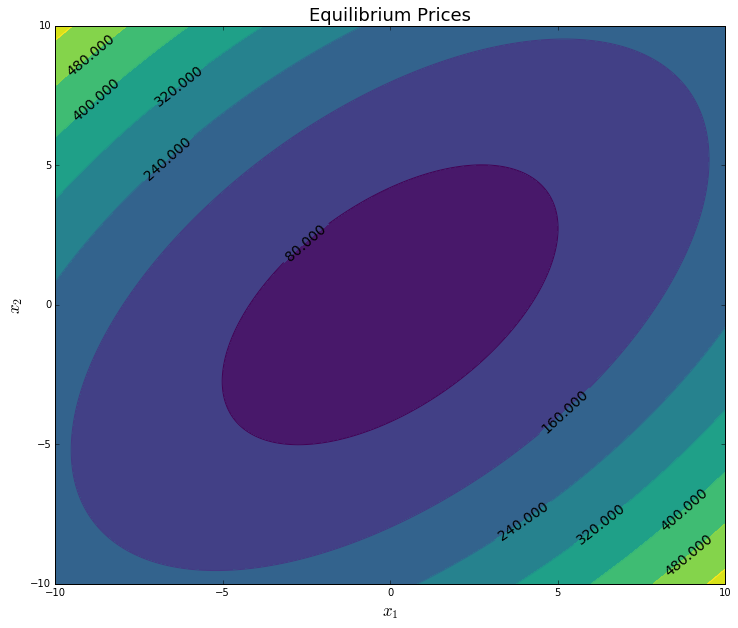

In [8]:
fig, ax = plt.subplots(figsize=(12, 10))

# con.set_cmap("viridis_r")
con = ax.contour(x1, x2, price_x1x2, cmap="viridis")
ax.clabel(con, colors="k", fontsize=14)
ax.contourf(x1, x2, price_x1x2, cmap="viridis")

ax.set_xlabel(r"$x_1$", fontsize=17)
ax.set_ylabel(r"$x_2$", fontsize=17)
ax.set_title("Equilibrium Prices", fontsize=18)

plt.show()